In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-case-study/dataset.csv


* # **Uber Case Study**
******

<img src = "https://www.passionateinmarketing.com/wp-content/uploads/2023/05/uber-title.png">

* # **DATA UNDERSTANDING**
## About Dataset
### DailyUber provides the 2016 data. By using this data find out the demand and supply Analysis gap of the cab. The main objective of this project is to analyse the data on Uber Request data. Through the analysis of data, we can find some important insights.
1. App Openings (Eyeballs) = Customers who launch the app looking for riders. It is a good measure of demand
2. Zeroes = Customers who open the app and see no cars in the area.
3. Request = Customers who make requests for a car.
4. Completed Trip = The point from when a customer is picked

In [2]:
data = pd.read_csv("/kaggle/input/uber-case-study/dataset.csv")

In [3]:
data.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [5]:
data.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

******

* # **DATA PREPROCESSING**

**Converting Field type to datetime index and Extracting only hours from the field.**

In [6]:
data["Time (Local)"] = pd.to_datetime(data["Time (Local)"], format = "%H")
data["Time (Local)"] = pd.to_datetime(data["Time (Local)"]).dt.time

**To get the data in required format coverting and concatnating data fields.**

In [7]:
data["Day Time"] = data["Date"].astype(str) + " " + data["Time (Local)"].astype(str)
data["Day Time"] = pd.to_datetime(data["Day Time"])

**Creating new field and converting its datatype.**

In [8]:
data["Day"] = data["Day Time"].dt.day_name()

In [9]:
data

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day Time,Day
0,10-Sep-12,07:00:00,5,0,2,2,9,2012-09-10 07:00:00,Monday
1,10-Sep-12,08:00:00,6,0,2,2,14,2012-09-10 08:00:00,Monday
2,10-Sep-12,09:00:00,8,3,0,0,14,2012-09-10 09:00:00,Monday
3,10-Sep-12,10:00:00,9,2,0,1,14,2012-09-10 10:00:00,Monday
4,10-Sep-12,11:00:00,11,1,4,4,11,2012-09-10 11:00:00,Monday
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,3,3,0,2,0,2012-09-24 02:00:00,Monday
332,24-Sep-12,03:00:00,3,3,0,1,0,2012-09-24 03:00:00,Monday
333,24-Sep-12,04:00:00,1,1,0,0,0,2012-09-24 04:00:00,Monday
334,24-Sep-12,05:00:00,4,2,1,1,3,2012-09-24 05:00:00,Monday


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    object        
 1   Time (Local)      336 non-null    object        
 2   Eyeballs          336 non-null    int64         
 3   Zeroes            336 non-null    int64         
 4   Completed Trips   336 non-null    int64         
 5   Requests          336 non-null    int64         
 6   Unique Drivers    336 non-null    int64         
 7   Day Time          336 non-null    datetime64[ns]
 8   Day               336 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 23.8+ KB


In [11]:
data.describe(include = "all")

/tmp/ipykernel_32/1217366577.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = "all")


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day Time,Day
count,336,336,336.000000,336.000000,336.000000,336.000000,336.000000,336,336
unique,15,24,NaN,NaN,NaN,NaN,NaN,336,7
top,11-Sep-12,07:00:00,NaN,NaN,NaN,NaN,NaN,2012-09-10 07:00:00,Monday
freq,24,14,NaN,NaN,NaN,NaN,NaN,1,48
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-10 07:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-09-24 06:00:00,NaN
mean,NaN,NaN,19.901786,4.252976,4.062500,5.529762,7.895833,NaN,NaN
std,NaN,NaN,16.902862,5.795391,5.672581,7.399416,5.884296,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,9.000000,1.000000,0.000000,1.000000,3.000000,NaN,NaN


In [12]:
data

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day Time,Day
0,10-Sep-12,07:00:00,5,0,2,2,9,2012-09-10 07:00:00,Monday
1,10-Sep-12,08:00:00,6,0,2,2,14,2012-09-10 08:00:00,Monday
2,10-Sep-12,09:00:00,8,3,0,0,14,2012-09-10 09:00:00,Monday
3,10-Sep-12,10:00:00,9,2,0,1,14,2012-09-10 10:00:00,Monday
4,10-Sep-12,11:00:00,11,1,4,4,11,2012-09-10 11:00:00,Monday
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,3,3,0,2,0,2012-09-24 02:00:00,Monday
332,24-Sep-12,03:00:00,3,3,0,1,0,2012-09-24 03:00:00,Monday
333,24-Sep-12,04:00:00,1,1,0,0,0,2012-09-24 04:00:00,Monday
334,24-Sep-12,05:00:00,4,2,1,1,3,2012-09-24 05:00:00,Monday


**We have one outlier in the field "Completed Trips".**

**If there is no Unique Driver available, it is not possible for customer to complete the trip.**

In [13]:
data[data["Unique Drivers"] == 0]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day Time,Day
22,11-Sep-12,05:00:00,1,1,0,0,0,2012-09-11 05:00:00,Tuesday
43,12-Sep-12,02:00:00,3,3,0,1,0,2012-09-12 02:00:00,Wednesday
44,12-Sep-12,03:00:00,2,2,0,0,0,2012-09-12 03:00:00,Wednesday
45,12-Sep-12,04:00:00,1,1,0,0,0,2012-09-12 04:00:00,Wednesday
65,13-Sep-12,00:00:00,11,11,0,2,0,2012-09-13 00:00:00,Thursday
66,13-Sep-12,01:00:00,6,6,0,1,0,2012-09-13 01:00:00,Thursday
67,13-Sep-12,02:00:00,5,5,0,3,0,2012-09-13 02:00:00,Thursday
68,13-Sep-12,03:00:00,2,2,0,2,0,2012-09-13 03:00:00,Thursday
69,13-Sep-12,04:00:00,1,1,0,0,0,2012-09-13 04:00:00,Thursday
70,13-Sep-12,05:00:00,1,1,0,1,0,2012-09-13 05:00:00,Thursday


**Removing the outlier.**

In [14]:
data["Completed Trips "].iloc[286] = 0

/tmp/ipykernel_32/2834537998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Completed Trips "].iloc[286] = 0


In [15]:
data.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers', 'Day Time', 'Day'],
      dtype='object')

**Simplifying the fields by rearranging it in understandable manner.**

In [16]:
data = data[["Date","Time (Local)","Day Time", 'Eyeballs ', 'Zeroes ', 'Completed Trips ', 'Requests ','Unique Drivers', 'Day']]
data

,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday


******

* # **DATA ANALYSIS AND VISUALIZATION**

 ## **1. Which date had the most completed trips during the two weeks?**

* #### **To find the date with the most completed trips, you can group the data by date and sum the completed trips column. Then, sort the results in descending order and select the top row.**

In [17]:
completed_trip = data.groupby(by = "Date").sum()["Completed Trips "]
completed_trip

/tmp/ipykernel_32/3896345897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  completed_trip = data.groupby(by = "Date").sum()["Completed Trips "]


Date
10-Sep-12     26
11-Sep-12     40
12-Sep-12     91
13-Sep-12     45
14-Sep-12    108
15-Sep-12    199
16-Sep-12     93
17-Sep-12     57
18-Sep-12     42
19-Sep-12     41
20-Sep-12     70
21-Sep-12    190
22-Sep-12    247
23-Sep-12    111
24-Sep-12      4
Name: Completed Trips , dtype: int64

<Axes: title={'center': 'Most Complete Trips in a day Within 2 Weeks'}, xlabel='Date', ylabel='No of Completed Trips'>

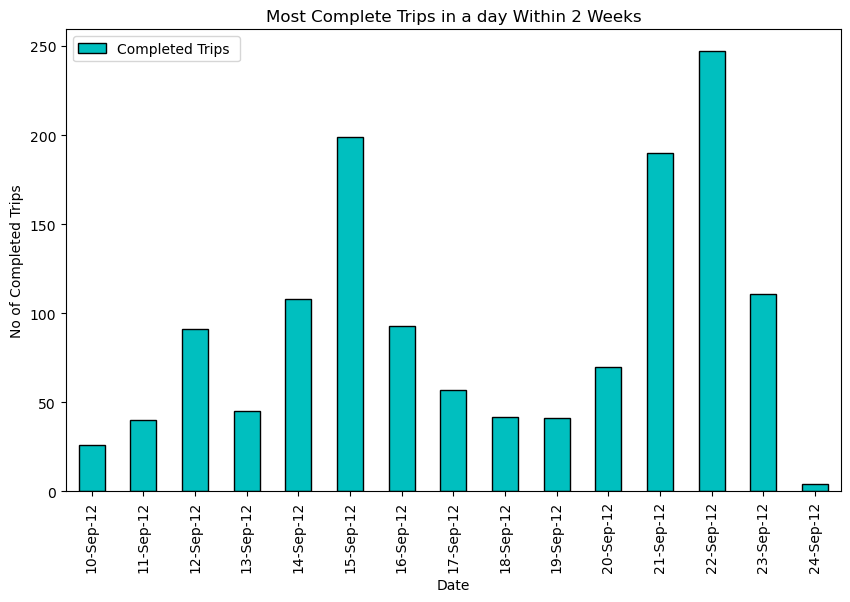

In [18]:
import matplotlib.pyplot as plt
completed_trip.plot(kind = "bar",figsize = (10,6), title = "Most Complete Trips in a day Within 2 Weeks", xlabel = "Date", ylabel= "No of Completed Trips", legend = True, color = "c", ec = "k")

## ***On 22-Sept-2012 total 247 trips were completed by the drivers which is highest in a two week of span.***
******

## **2. Which hour of the day had the most requests during the two-week period?**

* #### **To answer this question, we need to group the data by an hour and sum the "Requests" column for each hour. We can then sort the result by the sum of requests and select the hour with the highest sum.**

In [19]:
hourly_request = data.groupby(by = "Time (Local)").mean().round(0)['Requests ']
hourly_request

/tmp/ipykernel_32/3853246954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_request = data.groupby(by = "Time (Local)").mean().round(0)['Requests ']


Time (Local)
00:00:00    10.0
01:00:00     7.0
02:00:00     7.0
03:00:00     2.0
04:00:00     1.0
05:00:00     1.0
06:00:00     2.0
07:00:00     2.0
08:00:00     2.0
09:00:00     2.0
10:00:00     2.0
11:00:00     3.0
12:00:00     4.0
13:00:00     4.0
14:00:00     5.0
15:00:00     5.0
16:00:00     6.0
17:00:00     7.0
18:00:00     8.0
19:00:00    11.0
20:00:00     8.0
21:00:00     8.0
22:00:00    12.0
23:00:00    13.0
Name: Requests , dtype: float64

<Axes: title={'center': 'Most Request in an hours within 2Weeks'}, xlabel='No. of Request', ylabel='Hours'>

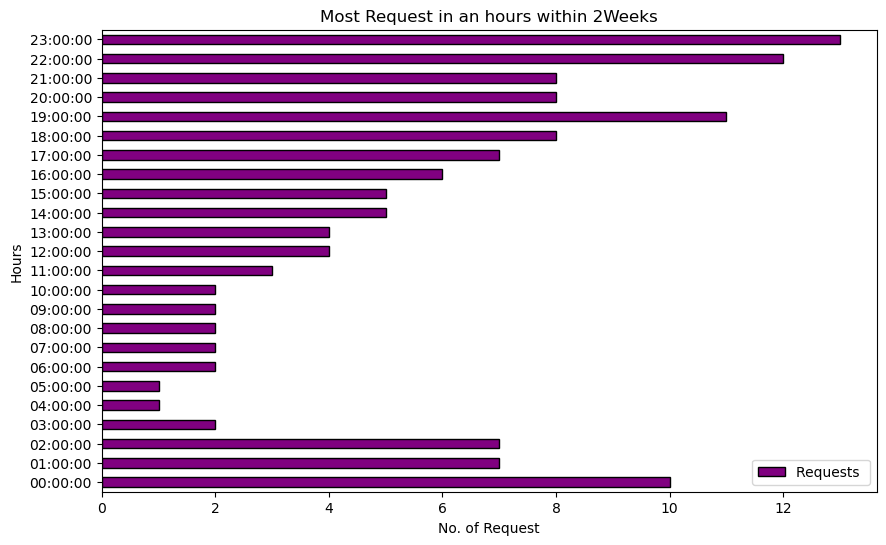

In [20]:
hourly_request.plot(kind = "barh",figsize = (10,6), title = "Most Request in an hours within 2Weeks", xlabel = "No. of Request", ylabel= "Hours", legend = True, color = "purple", ec = "k")

## ***Most of the requests for Uber service were asked within 10PM-12AM.***
******

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              336 non-null    object        
 1   Time (Local)      336 non-null    object        
 2   Day Time          336 non-null    datetime64[ns]
 3   Eyeballs          336 non-null    int64         
 4   Zeroes            336 non-null    int64         
 5   Completed Trips   336 non-null    int64         
 6   Requests          336 non-null    int64         
 7   Unique Drivers    336 non-null    int64         
 8   Day               336 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 23.8+ KB


## **3. What is the weighted average ratio of completed trips per driver during the two week period?**

* #### **To answer this question, we need to calculate the ratio of completed trips to unique drivers for each hour, multiply the ratio by the total number of completed trips for that hour, and then sum the results. We can then divide this sum by the total number of completed trips for the entire period.**

In [22]:
data

,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday
...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday


In [23]:
data["Completed Trips "].sum()

1364

In [24]:
data["Weighted Trips per Driver"] = (data["Completed Trips "] / data["Unique Drivers"]) * data["Completed Trips "]
data 

/tmp/ipykernel_32/3112193500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weighted Trips per Driver"] = (data["Completed Trips "] / data["Unique Drivers"]) * data["Completed Trips "]


,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Weighted Trips per Driver
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday,0.444444
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday,0.285714
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday,0.000000
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday,0.000000
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday,1.454545
...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday,NaN
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday,NaN
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday,NaN
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday,0.333333


In [25]:
data["Weighted Trips per Driver"] = data["Weighted Trips per Driver"].fillna(0).round(2)
data

/tmp/ipykernel_32/2533380210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weighted Trips per Driver"] = data["Weighted Trips per Driver"].fillna(0).round(2)


,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Weighted Trips per Driver
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday,0.44
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday,0.29
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday,0.00
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday,0.00
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday,1.45
...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday,0.00
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday,0.00
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday,0.00
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday,0.33


In [26]:
data["Weighted Average"] = data["Weighted Trips per Driver"].sum() / data["Completed Trips "].sum()
data["Weighted Average"] = data["Weighted Average"].round(2)
data

/tmp/ipykernel_32/1553272464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weighted Average"] = data["Weighted Trips per Driver"].sum() / data["Completed Trips "].sum()
/tmp/ipykernel_32/1553272464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weighted Average"] = data["Weighted Average"].round(2)


,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Weighted Trips per Driver,Weighted Average
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday,0.44,0.83
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday,0.29,0.83
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday,0.00,0.83
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday,0.00,0.83
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday,1.45,0.83
...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday,0.00,0.83
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday,0.00,0.83
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday,0.00,0.83
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday,0.33,0.83


In [27]:
data["Weighted average ratio"] = "26.13/31"

/tmp/ipykernel_32/1267423513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Weighted average ratio"] = "26.13/31"


## ***Weighted average ratio of completed trips is "26.13/31".***
******

In [28]:
data.head(10)

,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Weighted Trips per Driver,Weighted Average,Weighted average ratio
0,10-Sep-12,07:00:00,2012-09-10 07:00:00,5,0,2,2,9,Monday,0.44,0.83,26.13/31
1,10-Sep-12,08:00:00,2012-09-10 08:00:00,6,0,2,2,14,Monday,0.29,0.83,26.13/31
2,10-Sep-12,09:00:00,2012-09-10 09:00:00,8,3,0,0,14,Monday,0.00,0.83,26.13/31
3,10-Sep-12,10:00:00,2012-09-10 10:00:00,9,2,0,1,14,Monday,0.00,0.83,26.13/31
4,10-Sep-12,11:00:00,2012-09-10 11:00:00,11,1,4,4,11,Monday,1.45,0.83,26.13/31
5,10-Sep-12,12:00:00,2012-09-10 12:00:00,12,0,2,2,11,Monday,0.36,0.83,26.13/31
6,10-Sep-12,13:00:00,2012-09-10 13:00:00,9,1,0,0,9,Monday,0.00,0.83,26.13/31
7,10-Sep-12,14:00:00,2012-09-10 14:00:00,12,1,0,0,9,Monday,0.00,0.83,26.13/31
8,10-Sep-12,15:00:00,2012-09-10 15:00:00,11,2,1,2,7,Monday,0.14,0.83,26.13/31
9,10-Sep-12,16:00:00,2012-09-10 16:00:00,11,2,3,4,6,Monday,1.50,0.83,26.13/31


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       336 non-null    object        
 1   Time (Local)               336 non-null    object        
 2   Day Time                   336 non-null    datetime64[ns]
 3   Eyeballs                   336 non-null    int64         
 4   Zeroes                     336 non-null    int64         
 5   Completed Trips            336 non-null    int64         
 6   Requests                   336 non-null    int64         
 7   Unique Drivers             336 non-null    int64         
 8   Day                        336 non-null    object        
 9   Weighted Trips per Driver  336 non-null    float64       
 10  Weighted Average           336 non-null    float64       
 11  Weighted average ratio     336 non-null    object        
dtypes: datet

In [30]:
data.columns

Index(['Date', 'Time (Local)', 'Day Time', 'Eyeballs ', 'Zeroes ',
       'Completed Trips ', 'Requests ', 'Unique Drivers', 'Day',
       'Weighted Trips per Driver', 'Weighted Average',
       'Weighted average ratio'],
      dtype='object')

******

## **4. In drafting a driver schedule in terms of 8 hour shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.**

* #### **To solve this, we can first calculate the number of unique requests for each hour of the day, and then slide a window of 8 hours across the hours to find the 8 consecutive hours with the highest number of unique requests.**

In [46]:
shifts = data.resample("8H",label = "left", on = "Day Time", offset = "8H").sum()
shifts = shifts["Requests "]

/tmp/ipykernel_32/162489128.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shifts = data.resample("8H",label = "left", on = "Day Time", offset = "8H").sum()


In [47]:
shifts = shifts.reset_index()

In [48]:
shifts["Day"] = shifts["Day Time"].dt.day_name()

In [49]:
shifts = shifts.set_index("Day Time")

In [50]:
shifts

,Requests,Day
Day Time,,
2012-09-10 00:00:00,2,Monday
2012-09-10 08:00:00,11,Monday
2012-09-10 16:00:00,21,Monday
2012-09-11 00:00:00,7,Tuesday
2012-09-11 08:00:00,6,Tuesday
2012-09-11 16:00:00,39,Tuesday
2012-09-12 00:00:00,13,Wednesday
2012-09-12 08:00:00,60,Wednesday
2012-09-12 16:00:00,41,Wednesday


<Axes: title={'center': 'Busy 8 Hours'}, xlabel='Time', ylabel='No. of Request'>

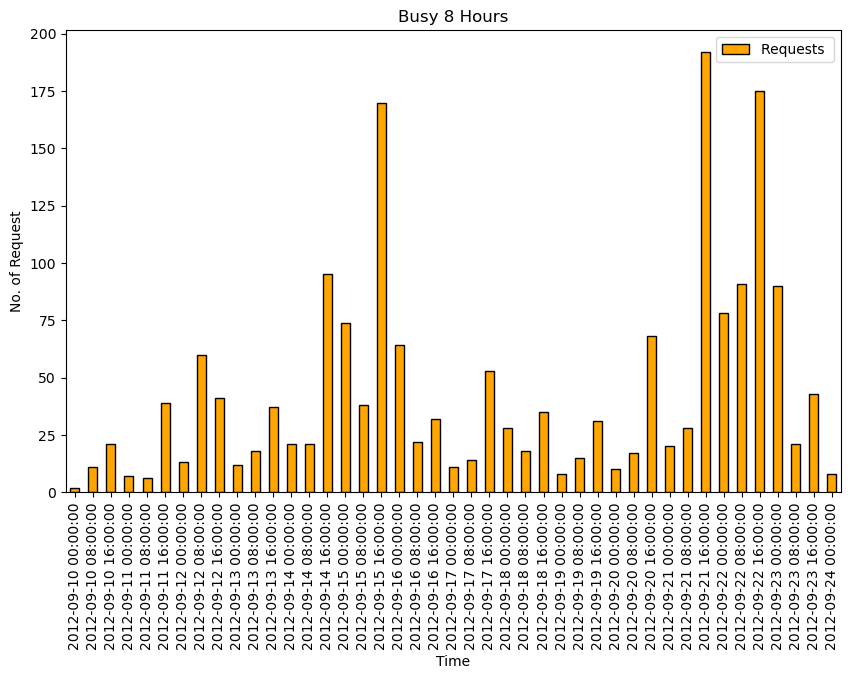

In [51]:
shifts["Requests "].plot(kind = "bar", figsize = (10,6), title = "Busy 8 Hours", xlabel = "Time", ylabel= "No. of Request", legend = True, color = "orange", ec ='k')

## ***According to our analysis, high demand for trips were observed within 3PM-11AM.***
******

## **5. True or False: Driver supply always increases when demand increases during the two week period.**

In [37]:
data.tail()

,Date,Time (Local),Day Time,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,Weighted Trips per Driver,Weighted Average,Weighted average ratio
331,24-Sep-12,02:00:00,2012-09-24 02:00:00,3,3,0,2,0,Monday,0.00,0.83,26.13/31
332,24-Sep-12,03:00:00,2012-09-24 03:00:00,3,3,0,1,0,Monday,0.00,0.83,26.13/31
333,24-Sep-12,04:00:00,2012-09-24 04:00:00,1,1,0,0,0,Monday,0.00,0.83,26.13/31
334,24-Sep-12,05:00:00,2012-09-24 05:00:00,4,2,1,1,3,Monday,0.33,0.83,26.13/31
335,24-Sep-12,06:00:00,2012-09-24 06:00:00,9,1,2,2,7,Monday,0.57,0.83,26.13/31


In [38]:
d_supply = data.groupby(by = "Date").sum()[["Eyeballs ", "Unique Drivers"]]
d_supply

/tmp/ipykernel_32/1053247105.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d_supply = data.groupby(by = "Date").sum()[["Eyeballs ", "Unique Drivers"]]


,Eyeballs,Unique Drivers
Date,,
10-Sep-12,189,138
11-Sep-12,314,132
12-Sep-12,423,201
13-Sep-12,325,159
14-Sep-12,549,211
15-Sep-12,788,193
16-Sep-12,426,150
17-Sep-12,377,164
18-Sep-12,342,134


<Axes: title={'center': 'Demand and Supply of Drivers'}, xlabel='Date', ylabel='No. of Requests and Unique Driver'>

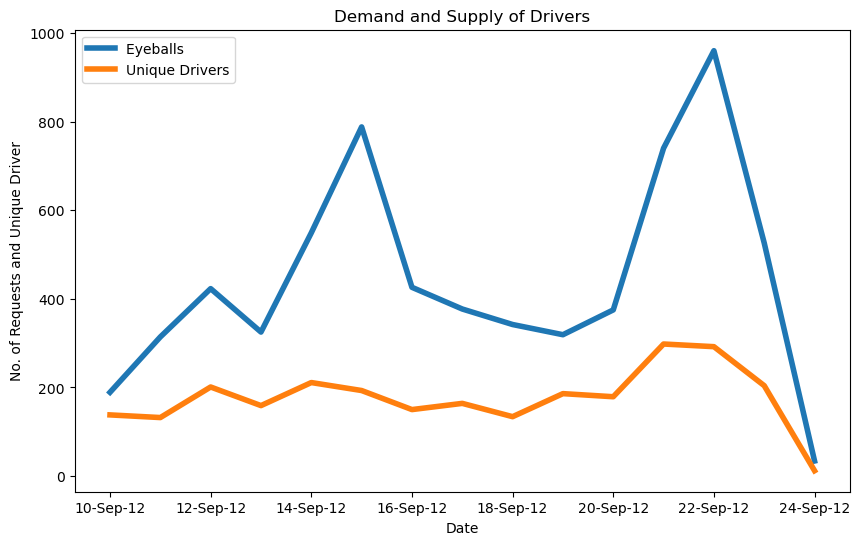

In [39]:
d_supply.plot(kind = "line", figsize = (10,6), xlabel = "Date", ylabel = "No. of Requests and Unique Driver", title = "Demand and Supply of Drivers", legend = True, linewidth = 4)

## ***This statement is false. There are multiple reasons why driver supply might not always increase when demand increases. For example, some drivers might choose not to work during peak demand times, or there might be external factors that affect driver availability (such as traffic, weather conditions, or events in the city). To confirm this, we would need to analyze the data and identify instances where demand increased but driver supply did not.***
******

## **5. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?**

* #### **To answer this question, we can group the data by 72-hour periods and calculate the ratio of zeroes to eyeballs for each period. We can then find the period with the highest ratio.**

In [40]:
ratio = data.resample("3D",label = "right", on = "Day Time").sum()[["Eyeballs ", "Zeroes "]]
ratio["Zeroes/Eyeballs"] = ratio["Zeroes "] / ratio["Eyeballs "]
ratio.round(2)

/tmp/ipykernel_32/2526477510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratio = data.resample("3D",label = "right", on = "Day Time").sum()[["Eyeballs ", "Zeroes "]]


,Eyeballs,Zeroes,Zeroes/Eyeballs
Day Time,,,
2012-09-13,926,145,0.16
2012-09-16,1662,430,0.26
2012-09-19,1145,263,0.23
2012-09-22,1434,238,0.17
2012-09-25,1520,353,0.23


<Axes: xlabel='Eyeballs ', ylabel='Zeroes '>

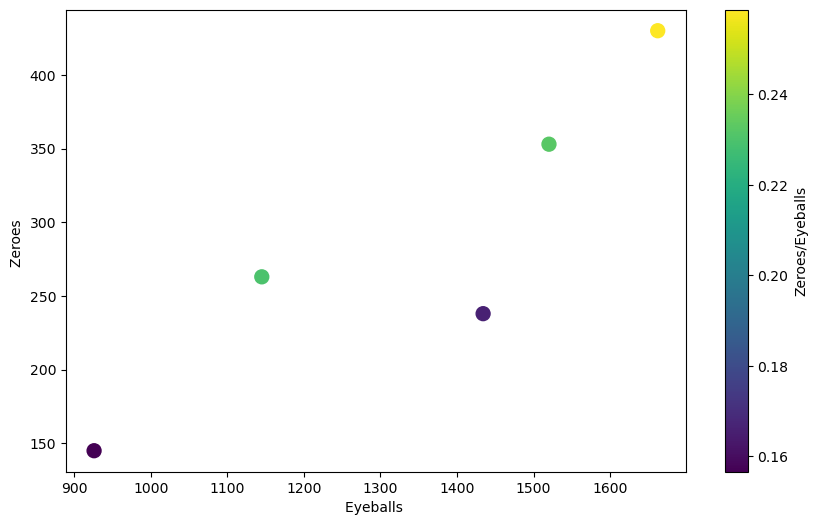

In [41]:
ratio.plot.scatter(x="Eyeballs ", y="Zeroes ", c="Zeroes/Eyeballs", colormap= "viridis", figsize = (10,6), s = 100)

## ***The ratio of Zeroes to Eyeballs were highest during 13-Sept-2012 to 15-Sept-2012.***
******

## **6. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?**

* #### **To determine which hour to add 5 drivers too, we want to look for an hour where there are a high number of rider eyeballs and a low number of unique drivers. One way to approach this is to calculate the ratio of requests to unique drivers for each hour and then choose the hour with the highest ratio. The idea here is that adding more drivers to an hour with a high ratio will result in more completed trips**

In [42]:
new_driver = data.groupby(by = "Time (Local)").sum()[["Eyeballs " , "Unique Drivers"]]
new_driver["ratio"] = (new_driver["Eyeballs "] / new_driver["Unique Drivers"]).round(2)
new_driver.sort_values(by = "ratio", ascending = False)

/tmp/ipykernel_32/4065459529.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_driver = data.groupby(by = "Time (Local)").sum()[["Eyeballs " , "Unique Drivers"]]


,Eyeballs,Unique Drivers,ratio
Time (Local),,,
23:00:00,488,119,4.10
05:00:00,42,11,3.82
22:00:00,492,144,3.42
04:00:00,29,9,3.22
00:00:00,339,111,3.05
21:00:00,459,155,2.96
02:00:00,170,62,2.74
14:00:00,332,125,2.66
18:00:00,447,174,2.57


<Axes: xlabel='Eyeballs ', ylabel='Unique Drivers'>

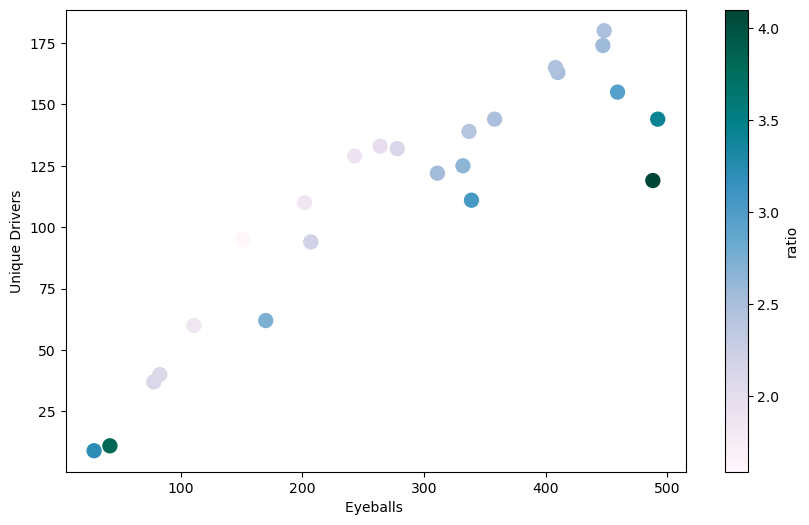

In [43]:
new_driver.sort_values(by = "ratio", ascending = False).plot.scatter(x = "Eyeballs ", y = "Unique Drivers", c = "ratio", colormap = "PuBuGn", figsize = (10,6), s = 100)

## ***As the ratio of Eyeballs to Uniue Drivers are highest within 11PM-12AM, This indicates there is high demand and less supply in this hour, so it is very good idea to add 5 extra drivers within this hour.***
******

## **7. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" ? (i.e when are supply and demand at both their natural minimums)**

* #### **One way to approach this question is to calculate the average number of completed trips and unique drivers for each hour of the day over the entire two-week period. We can then look for the hour with the lowest number of completed trips and unique drivers to find the time when supply and demand are at their natural minimums.**

In [44]:
end_day = data.groupby(by = "Time (Local)").mean().round(0)[["Completed Trips ", "Unique Drivers"]]
end_day = end_day.reset_index()
end_day

/tmp/ipykernel_32/2445416640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  end_day = data.groupby(by = "Time (Local)").mean().round(0)[["Completed Trips ", "Unique Drivers"]]


,Time (Local),Completed Trips,Unique Drivers
0,00:00:00,7.0,8.0
1,01:00:00,5.0,7.0
2,02:00:00,4.0,4.0
3,03:00:00,2.0,3.0
4,04:00:00,0.0,1.0
5,05:00:00,0.0,1.0
6,06:00:00,1.0,3.0
7,07:00:00,1.0,4.0
8,08:00:00,2.0,7.0
9,09:00:00,1.0,8.0


([<matplotlib.axis.XTick at 0x7bac2c232e90>,
 [Text(0, 0, '00:00'),
  Text(7200, 0, '02:00'),
  Text(14400, 0, '04:00'),
  Text(21600, 0, '06:00'),
  Text(28800, 0, '08:00'),
  Text(36000, 0, '10:00'),
  Text(43200, 0, '12:00'),
  Text(50400, 0, '14:00'),
  Text(57600, 0, '16:00'),
  Text(64800, 0, '18:00'),
  Text(72000, 0, '20:00'),
  Text(79200, 0, '22:00')])

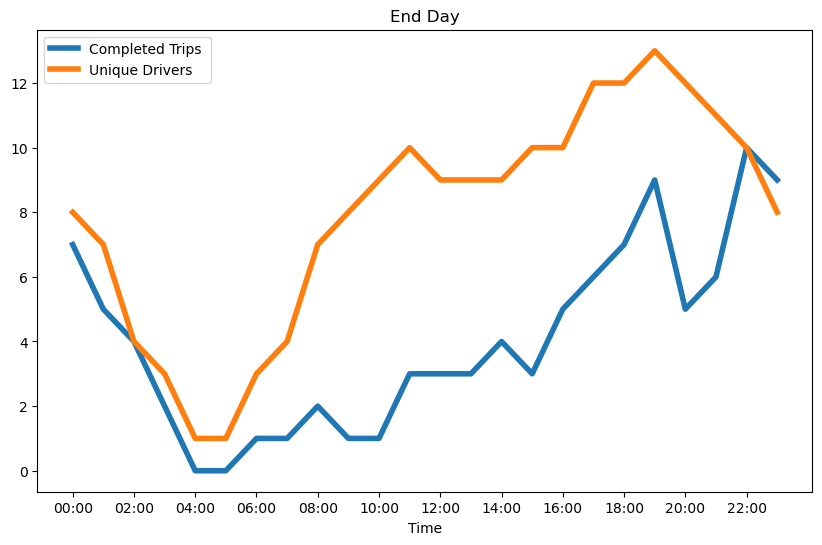

In [45]:
end_day.plot(x = "Time (Local)",kind = "line", figsize = (10,6), xlabel = "Time", ylabel = "", title = "End Day", legend = True, linewidth = 4)
plt.xticks(range(0,86400,7200))


## ***Within 4AM-5AM, less demand is observed as completed trips and reuests are least in this hour, so we can counclude end of the day is within this hour.***
******